# BFGS and L-BFGS on Logistic Regression simple neural network

In [23]:
using NBInclude
@nbinclude("Iris_Binary.ipynb");
@nbinclude("Visualization.ipynb");
@nbinclude("LogRegNN.ipynb");
@nbinclude("BFGS_LBFGS.ipynb");

### Iris Binary Subset

In [13]:
X, Y = get_binary_iris();

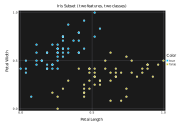

In [14]:
visualize_dataset( X[:, 1], X[:, 2], Y,
    "Iris Subset (two features, two classes)", "Petal Length", "Petal Width" )

### LogRegNN training using BFGS

In [15]:
""" Parameters """
ITERS = 6;
range = -0:0.001:0.01
HIDDEN_SIZE = 2

""" Random initial weights may result in BFGS being stuck """
# W1 = rand(range, 2, HIDDEN_SIZE )
# b1 = [0.001 0.001]
# W2 = rand(range, HIDDEN_SIZE, 1 )
# b2 = 0.001;
# weights = Dict("W1"=>[W1], "b1"=>[b1], "W2"=>[W2], "b2"=>[b2])

W2 = reshape([0.01; -0.01], (2,1))
W1 = [0.001 -0.01; 0.006 -0.009]
b2 = 0.01
b1 = [0.01 0.01]
weights = Dict("W1"=>[W1], "b1"=>[b1], "W2"=>[W2], "b2"=>[b2])

Dict{String,Array{T,1} where T} with 4 entries:
  "W2" => [[0.01; -0.01]]
  "W1" => [[0.001 -0.01; 0.006 -0.009]]
  "b2" => [0.01]
  "b1" => [[0.01 0.01]]

In [16]:
# Iteration 7 sends BFGS to infinite loop (?)
losses, i = train_LogRegNN_BFGS( weights, ITERS )


==== Iteration 1 ====
[1.174417522717234 0.09269513436010299 -0.026482111224338037 -0.11648212071512605 0.2867994449497206 -0.15222018352814148 0.09879412409521587 0.06643102693908057 0.10286613462288732; 0.09269513436010299 1.0492626575515926 -0.013894905182365164 -0.0616873041206084 0.15242318056333298 -0.08038522813949897 0.05287580064129409 0.03552957329139286 0.05503190180072534; -0.026482111224338037 -0.013894905182365164 0.9562710879641098 -0.04034987400794235 -0.04409608969925595 -0.11361890261306881 -0.11391593810072284 -0.06990689684599562 -0.11240443353006982; -0.11648212071512605 -0.0616873041206084 -0.04034987400794235 1.007253783830275 -0.19220419360206378 -0.06452609827197238 -0.18620158957190466 -0.11707152858619257 -0.18633248094068816; 0.2867994449497206 0.15242318056333298 -0.04409608969925595 -0.19220419360206378 1.4715857215184243 -0.2518770799953814 0.16130875872223427 0.1085442452133828 0.16802904451741912; -0.15222018352814148 -0.08038522813949897 -0.1136189026

[5.5358723068473825 -1.454287365445311 2.5274018815660653 -12.84831139558313 -0.6016910717864282 -7.19274623971121 -6.83023758271542 21.97896143357406 6.667720156710422; -1.45428736544531 0.9278660816981535 -0.8388796770881215 4.260677682382666 -0.1805998607320989 2.384092311405666 2.342816755985532 -7.2907212558988 -2.283958165419186; 2.5274018815660666 -0.8388796770881222 2.224898804821824 -6.732848692803462 -0.12837924760871022 -3.944451015975682 -3.4632111556702396 11.249866198318946 3.3810805073220918; -12.848311395583135 4.2606776823826715 -6.732848692803462 34.641984693831155 0.6558750677889847 18.630265691770354 17.597760366039246 -57.85887853643282 -17.180771151738774; -0.6016910717864272 -0.18059986073209874 -0.12837924760870967 0.6558750677889822 0.3081281429805302 0.3682551697790939 0.2561409411535102 -1.1202273068835378 -0.2510329417644561; -7.192746239711211 2.3840923114056656 -3.9444510159756807 18.630265691770344 0.368255169779094 10.936636389388754 9.84857769392736 -32

([6.86003692891444 0.6657704560653177 … 0.6640087561914588 0.5269053687757869], 6)

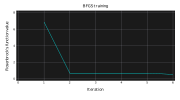

In [17]:
# y = [round(v, digits=8) for v in values]
visualize_training_process( length(losses), losses,
    "BFGS training", "Iteration", "Rosenbrock's function value" )

In [18]:
SPAN = 500; LEFT = -0.01; RIGHT = 0.01
W2_ax = LinRange( LEFT, RIGHT, SPAN );

levels = [LinRange(-10, 10, 50)...];

In [19]:
W2_history = zeros(2, ITERS)
for i in 1:ITERS
    W2_history[1,i] = weights["W2"][i][1]
    W2_history[2,i] = weights["W2"][i][2]
end
W2_history

2×6 Array{Float64,2}:
  0.01   0.00246983   0.00250025   0.00246759   0.00231555   0.00136878
 -0.01  -0.0139872   -0.013971    -0.0139884   -0.0140767   -0.0149441

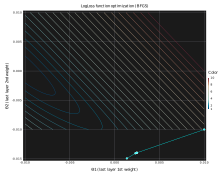

In [20]:
contour_cost(
    W2_ax, W2_ax,
    (x, y) -> cost_for_W2(x, y, Y), levels,
    W2_history, 1,
    "LogLoss function optimization (BFGS)",
    "Θ1 (last layer 1st weight)",
    "Θ2 (last layer 2nd weight)",
)

### LogRegNN training using L-BFGS

In [28]:
""" Parameters """
ITERS = 20;
range = -0:0.001:0.01
HIDDEN_SIZE = 2
W2 = reshape([0.01; -0.01], (2,1))
W1 = [0.001 -0.01; 0.006 -0.009]
b2 = 0.01
b1 = [0.01 0.01]
weights = Dict("W1"=>[W1], "b1"=>[b1], "W2"=>[W2], "b2"=>[b2])

m = 4;

In [29]:
losses, i = train_LogRegNN_LBFGS( weights, ITERS, m )


==== Iteration 1 ====
Iteration 1 finished. Weights:
W2 [0.00246983; -0.01398717]
W1 [-0.00179667 -0.02242752; 0.0062402 -0.01371028]
b2 -0.00242715
b1 [0.00219596 -0.00242722]

==== Iteration 2 ====
Iteration 2 finished. Weights:
W2 [0.00246983; -0.01398717]
W1 [-0.00179667 -0.02242751; 0.0062402 -0.01371028]
b2 -0.00242714
b1 [0.00219596 -0.00242721]

==== Iteration 3 ====
Iteration 3 finished. Weights:
W2 [0.00246724; -0.01398851]
W1 [-0.0017974 -0.022432; 0.00624024 -0.01370837]
b2 -0.00242892
b1 [0.00219369 -0.00242915]

==== Iteration 4 ====
Iteration 4 finished. Weights:
W2 [0.00246523; -0.01398955]
W1 [-0.00179791 -0.02243556; 0.00624026 -0.01370614]
b2 -0.00242971
b1 [0.00219202 -0.00243009]

==== Iteration 5 ====
Iteration 5 finished. Weights:
W2 [0.00246364; -0.01399037]
W1 [-0.00179829 -0.02243841; 0.00624027 -0.01370402]
b2 -0.00243007
b1 [0.00219074 -0.00243058]

==== Iteration 6 ====
Iteration 6 finished. Weights:
W2 [0.00246214; -0.01399113]
W1 [-0.00179864 -0.02244111

([6.86003692891444 0.6657704560653177 … 0.6657650850426104 0.6657650900421508], 20)